**Ревью**

Привет, меня зовут Дмитрий и я буду проверять твой проект. Попробую помочь сделать тебе его еще лучше!

Предлагаю общаться на «ты». Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на «вы».

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>
  
Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>
  
Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
  
Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b>
  
Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

**Комментарий по работе**

Ты успешно справился с задачей и обучил модель, которая достаточно точно определяет токсичные комментарии. Пожалуйста, обрати внимание на комментарий про precision-recall кривую. Пиши также, если остались какие-то вопросы!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>BERT</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» Осторожно! BERT!

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
!pip install transformers
!pip install torch
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.dummy import DummyClassifier
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import torch
import transformers as ppb

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [5]:
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df['toxic'].unique()

array([0, 1], dtype=int64)

В данных нет дубликатов и пропусков, в тексте имеются символы переноса строки и техническая информация о сообщениях. Текст не лемматизирован.

<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Данны загружены и проверены

</div>

In [9]:
corpus = df['text'].values.astype('U')

Почистим данные от числовых значений, никнеймов и хэштегов. Слова с апострофами нормализуем. Для нормализации используем готовый словарь сокращений английских слов.

In [5]:
contractions_dict = { "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "‘cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "that'd": "that would", "that'd've": "that would have", "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not","what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", "where'd": "where did", "where've": "where have",
"who'll": "who will", "who'll've": "who will have", "who've": "who have", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [6]:
contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    def replace(match):
        return contractions_dict[match.group(0)]
    text = text.lower()
    text = contractions_re.sub(replace, text)
    clean_text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|([^'A-Za-z])|(\w+:\/\/\S+)"," ",text).split())
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, 'v') for w in nltk.word_tokenize(clean_text)]).replace("'", "").strip()

    return lemmatized_output

In [7]:
df['lemmas'] = df['text'].apply(lemmatize)

In [13]:
df.head()

,text,toxic,lemmas
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,daww he match this background colour i m seemi...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not try to edit war it be j...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can not make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Отлично, ты нормализовал текст, приведя его к нижнему регистру и удалив спецсимволы. Здорово, что также развернул сокращения и применил лемматизацию!

</div>

In [14]:
df['toxic'].value_counts()[0]/df['toxic'].value_counts()[1]

8.834884437596301

Классы не сбалансированы, отношение положительных тестов к отрицательным ~ 9 к 1

<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Хорошее наблюдение!

</div>

## Обучение

In [8]:
features = df.drop(['toxic'], axis=1)
target = df['toxic']

In [9]:
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target,
                                                                              test_size=0.2,
                                                                              random_state=123,stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid,
                                                                            target_valid,
                                                                            test_size=0.5,
                                                                            random_state=123,stratify=target_valid)

<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Данные поделены на обучающую, валидационную и тестовую выборку

</div>

In [10]:
stopwords = set(nltk_stopwords.words('english'))

<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Здорово, что удаляешь часто используемые слова

</div>

In [11]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)


In [12]:
features_train = count_tf_idf.fit_transform(features_train['lemmas'].values.astype('U'))
features_valid = count_tf_idf.transform(features_valid['lemmas'].values.astype('U'))
features_test = count_tf_idf.transform(features_test['lemmas'].values.astype('U'))

<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Векторизация с взвешиванием TF-IDF сделана корректно

</div>

In [20]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(127656, 132685)
(15957, 132685)
(15958, 132685)


### Logistic Regression

In [13]:
%%time
logistic_model = LogisticRegression(random_state=123)
train_f1 = cross_val_score(logistic_model,
                           features_train,
                           target_train,
                           scoring='f1').mean()
print('f1 ', train_f1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1  0.7226028857166
Wall time: 21 s


Для улучшения качества модели подберем порог отсечения

In [21]:
logistic_model = LogisticRegression(random_state=123)
logistic_model.fit(features_train, target_train)
lr_probs = logistic_model.predict_proba(features_valid)
lr_probs = lr_probs[:, 1]
precision, recall, thresholds = precision_recall_curve(target_valid, lr_probs)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_probs = dummy_clf.predict_proba(features_valid)
dummy_probs = dummy_probs[:, 1]
precision_d, recall_d, thresholds_d = precision_recall_curve(target_valid, dummy_probs)

dummy_clf_s = DummyClassifier(strategy="stratified")
dummy_clf_s.fit(features_train, target_train)
dummy_probs_s = dummy_clf_s.predict_proba(features_valid)
dummy_probs_s = dummy_probs_s[:, 1]
precision_s, recall_s, thresholds_s = precision_recall_curve(target_valid, dummy_probs_s)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


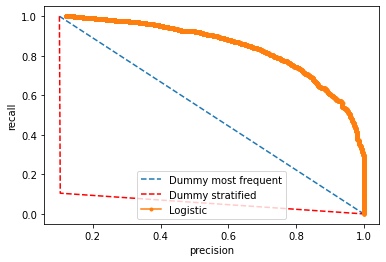

In [22]:
plt.plot(precision_d, recall_d, linestyle='--', label='Dummy most frequent')
plt.plot(precision_s, recall_s, linestyle='--',color ='red', label='Dummy stratified')
plt.plot(precision, recall, marker='.', label='Logistic')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend()
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера</b>
 
К графикам precision-recall есть вопрос: почему 'No skill' модель будет выглядеть как прямая проходящая через (0,0) и (1,1)? Кажется, что ты просто скопировал ее из графика ROC-кривой, но здесь это не работает. Рекомендую попробовать [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) с разными стратегиями и посмотреть, какие получатся графики :)

</div>

In [24]:
f1_scores = 2*recall*precision/(recall+precision)
print('Best Threshold=%f, f1 score=%.3f' % (thresholds[np.argmax(f1_scores)], max(f1_scores)))
f1_scores_d = 2*recall_d*precision_d/(recall_d+precision_d)
print('f1 score Dummy=%.3f' % (max(f1_scores_d)))
f1_scores_s = 2*recall_s*precision_s/(recall_s+precision_s)
print('f1 score Dummy=%.3f' % (max(f1_scores_s)))

Best Threshold=0.230348, f1 score=0.773
f1 score Dummy=0.185
f1 score Dummy=0.185


С подобранным порогом значение f1 увеличилось на 0.05. Рассчитаем метрику на валидационной и тестовой выборке.

In [25]:
%%time
logistic_model = LogisticRegression(class_weight={0:0.23,1:0.77},random_state=123)

logistic_model.fit(features_train, target_train)
predicted_valid = logistic_model.predict(features_valid)
predicted_test = logistic_model.predict(features_test)
print('f1_valid: ',f1_score(target_valid,predicted_valid))
print('f1_test: ',f1_score(target_test,predicted_test))

f1_valid:  0.7542819499341239
f1_test:  0.7641693811074919
Wall time: 4.71 s


### Random Forest

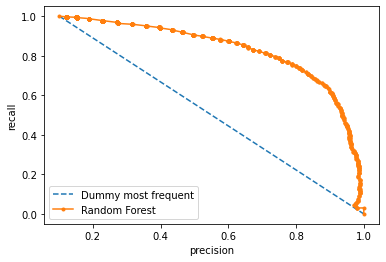

Wall time: 8min 21s


In [25]:
%%time
forest_model = RandomForestClassifier(random_state=123)
forest_model.fit(features_train, target_train)
forest_probs = forest_model.predict_proba(features_valid)
forest_probs = forest_probs[:, 1]
precision, recall, thresholds = precision_recall_curve(target_valid, forest_probs)
precision_d, recall_d, thresholds_d = precision_recall_curve(target_valid, dummy_probs)
plt.plot(precision_d, recall_d, linestyle='--', label='Dummy most frequent')
plt.plot(precision, recall, marker='.', label='Random Forest')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend()
plt.show()

In [27]:
f1_scores = 2*recall*precision/(recall+precision)
print('Best Threshold=%f, F-1 score=%.3f' % (thresholds[np.argmax(f1_scores)], max(f1_scores)))

Best Threshold=0.316667, F-1 score=0.779


In [42]:
%%time
forest_model = RandomForestClassifier(class_weight={0:0.317,1:0.683},random_state=123)
forest_model.fit(features_train, target_train)
predicted_valid = forest_model.predict(features_valid)
predicted_test = forest_model.predict(features_test)
print('f1_valid: ',f1_score(target_valid,predicted_valid))
print('f1_test: ',f1_score(target_test,predicted_test))

f1_valid:  0.6467741935483872
f1_test:  0.665073675826364
Wall time: 9min 26s


<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Отлично, ты успешно обучил модели на векторизованных текстовых данных! Модели валидированы корректно. Здорово, что применил веса классов для балансировки!

</div>

### BERT

Обучим модель distilbert. Т.к. с оперативкой беда,сделаем срез из 500 элементов, по той же причине протестируем модель без валидационной выборки

In [29]:
batch_1 = df[:500]
batch_1['toxic'].value_counts()


0    450
1     50
Name: toxic, dtype: int64

In [30]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [31]:
tokenized = batch_1['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True) if len(x) <=512 else tokenizer.encode(x[:512], add_special_tokens=True)))

In [32]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [33]:
np.array(padded).shape

(500, 230)

In [34]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(500, 230)

<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Паддинг и маска для аттеншен сделаны корректно

</div>

In [35]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [36]:
features = last_hidden_states[0][:,0,:].numpy()
labels = batch_1['toxic']

In [37]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [39]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)
predicted_test = lr_clf.predict(test_features)
print('f1_test: ',f1_score(test_labels,predicted_test))

f1_test:  0.7499999999999999


<div class="alert alert-success">
<b>Комментарий ревьюера</b>
 
Модель успешно обучена, но, конечно, сделать какие-либо выводы по такой маленькой выборке нельзя

</div>

## Выводы

Наилучшая модель TF-IDF на данной выборке - **Логистическая регрессия**(f1 - 0.76, Wall Time -4.71s), **Random Forest** не справился с задачей, не смотря на хорошие результаты на тренировочной выборке на тестовой показал f1 = 0.665, время обучения так же оказалось достаточно долгим- 9 min 26s. Так же была протестирована модель **distilbert** на срезе из 500 строк (объем выборки обусловлен капиталистической структурой нашего общества, а именно в цене на железо, поэтому имея в наличии 16 Гигов оперативки мы ограничены в возможностях реально оценить преимущество данного подхода в NLP). Метрика f1 логистической регрессии на данной выборке составила 0.75. Реальное значение метрики в данном случае оценить невозможно, поэтому просто поверим гуглу, что BERT действительно хорош.
Таким образом модели TF-IDF достаточно хорошо справляются с задачами классификации в условиях ограниченности ресурсов.

<div class="alert alert-warning">
<b>Комментарий ревьюера</b>
 
Ну дело скорее не в оперативной памяти, а в том, что на CPU очень долго это все будет считаться. Вот с GPU уже можно получить какие-то результаты. Если будет желание, можешь попробовать запустить модель на google colab. Все 150000 строк использовать, наверно, все равно не получится, но точно можно взять больше 500 :)

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>
Можно конечно, но я думаю это не решит проблему, а рандомно вытягивать кучу срезов для получения метрики по всей выборке тоже выйдет долго, может есть какие-нибудь другие варианты?</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны